In [1]:
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [34]:
def aug_image(image):
    p = 0.5
    aug = Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)
    image = aug(image=image)['image']
    return image

In [35]:
imagegen = ImageDataGenerator(preprocessing_function=aug_image,rescale=1./255)

In [36]:
train = imagegen.flow_from_directory("data\intel-image-classification\seg_train\seg_train",target_size=(150, 150),batch_size=1)

Found 14034 images belonging to 6 classes.


In [37]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

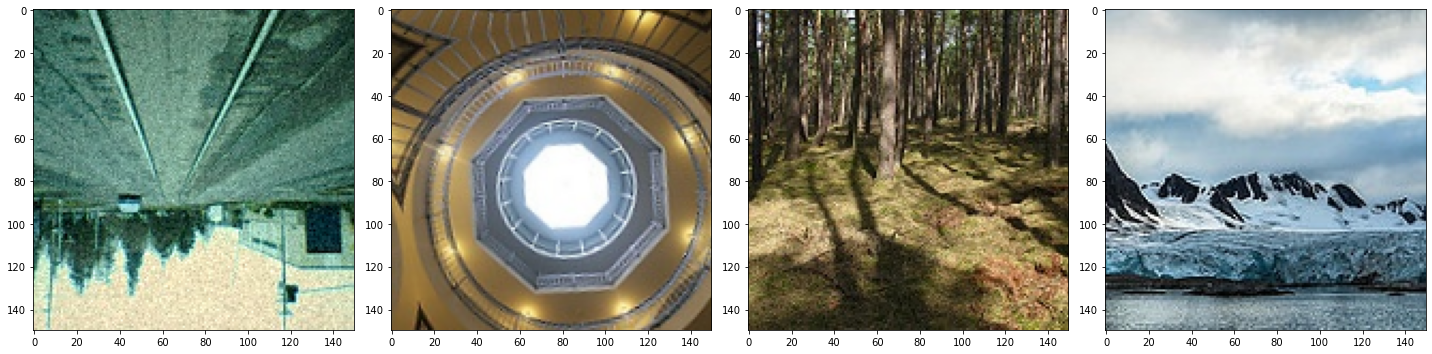

In [49]:
# asss = [train[i] for i in range(15,18)]
augmented_images = [train[i][0][0] for i in range(35,39)]
plotImages(augmented_images)